### Dataset - Breeding Birds Atlas

In [ ]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import warnings
import seaborn as sns # type: ignore
import math

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('breeding_bird_atlas.csv')

In [ ]:
print("Dataset shape",df.shape)

Dataset shape (361582, 16)


In [ ]:
df.head(10)

,Fed. Region,Block ID,Map Link,County,Common Name,Scientific Name,NYS Protection Status,Family Name,Family Description,Breeding Behavior,Month,Day,Year,Temperature,Average UB Student GPA,Breeding Status
0,NaN,5773C,50,NaN,NaN,12,10,71,TYRANT FLYCATCHERS,singing male present on more than one date in ...,NaN,NaN,1985.0,59,2.26,Probable
1,8.0,5569B,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5569b...,ALBANY,Alder Flycatcher,Empidonax alnorum,Protected,TYRANNIDAE,TYRANT FLYCATCHERS,"Nest and eggs, bird on nest or egg, or eggshel...",NaN,NaN,1985.0,78,2.77,Confirmed
2,8.0,5773C,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5773c...,ALBANY,American Black Duck,Anas rubripes,Game Species,ANATIDAE,"SWANS, GEESE & DUCKS",Pair observed in suitable habitat in breeding ...,NaN,NaN,1985.0,72,3.08,Probable
3,8.0,5872A,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5872a...,ALBANY,American Black Duck,Anas rubripes,Game Species,ANATIDAE,"SWANS, GEESE & DUCKS",Species seen in possible nesting habitat or si...,NaN,NaN,1985.0,52,2.09,Possible
4,8.0,5570D,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5570d...,ALBANY,American Crow,Corvus brachyrhynchos,Game Species,CORVIDAE,"JAYS, MAGPIES & CROWS",Singing male present on more than one date in ...,NaN,NaN,1985.0,28,2.28,Probable
5,8.0,5671D,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5671d...,ALBANY,American Crow,Corvus brachyrhynchos,Game Species,CORVIDAE,"JAYS, MAGPIES & CROWS",Species seen in possible nesting habitat or si...,NaN,NaN,1985.0,41,2.86,Possible
6,8.0,5669A,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5669a...,ALBANY,American Crow,Corvus brachyrhynchos,Game Species,CORVIDAE,"JAYS, MAGPIES & CROWS",Species seen in possible nesting habitat or si...,NaN,NaN,1985.0,40,3.62,Possible
7,8.0,5872C,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5872c...,ALBANY,American Crow,Corvus brachyrhynchos,Game Species,CORVIDAE,"JAYS, MAGPIES & CROWS",Adult(s) with food for young or feeding young.,NaN,NaN,1985.0,35,3.06,Confirmed
8,8.0,5870D,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5870d...,ALBANY,American Crow,Corvus brachyrhynchos,Game Species,CORVIDAE,"JAYS, MAGPIES & CROWS",Nest with young.,NaN,NaN,1985.0,55,3.11,Confirmed
9,8.0,5871B,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5871b...,ALBANY,American Crow,Corvus brachyrhynchos,Game Species,CORVIDAE,"JAYS, MAGPIES & CROWS",Adult(s) with food for young or feeding young.,NaN,NaN,1985.0,74,3.15,Confirmed


In [ ]:
df.describe()

,Fed. Region,Month,Day,Year,Temperature,Average UB Student GPA
count,355787.000000,3426.000000,9338.000000,351102.000000,361582.000000,361582.000000
mean,5.855652,49.772329,49.511994,1964.180056,49.467487,2.850668
std,5.836586,28.659289,28.794700,190.069866,17.322758,0.490552
min,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000
25%,3.000000,26.000000,25.000000,1982.000000,34.000000,2.430000
50%,6.000000,50.000000,49.000000,1983.000000,49.000000,2.850000
75%,8.000000,74.000000,75.000000,1984.000000,64.000000,3.280000
max,99.000000,99.000000,99.000000,1985.000000,79.000000,3.700000


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361582 entries, 0 to 361581
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Fed. Region             355787 non-null  float64
 1   Block ID                358864 non-null  object 
 2   Map Link                356865 non-null  object 
 3   County                  350980 non-null  object 
 4   Common Name             351052 non-null  object 
 5   Scientific Name         354097 non-null  object 
 6   NYS Protection Status   353112 non-null  object 
 7   Family Name             359126 non-null  object 
 8   Family Description      356849 non-null  object 
 9   Breeding Behavior       356399 non-null  object 
 10  Month                   3426 non-null    float64
 11  Day                     9338 non-null    float64
 12  Year                    351102 non-null  float64
 13  Temperature             361582 non-null  int64  
 14  Average UB Student G

In [ ]:
print("Categorical Columns - ",df.select_dtypes(include=['object']).columns)

Categorical Columns -  Index(['Block ID', 'Map Link', 'County', 'Common Name', 'Scientific Name',
       'NYS Protection Status', 'Family Name', 'Family Description',
       'Breeding Behavior', 'Breeding Status'],
      dtype='object')


In [ ]:
print("Numerical Columns-",df.select_dtypes(include=['int64','float64']).columns)

Numerical Columns- Index(['Fed. Region', 'Month', 'Day', 'Year', 'Temperature',
       'Average UB Student GPA'],
      dtype='object')


In [ ]:
cat = len(df.select_dtypes(include=['object']).columns)
num = len(df.select_dtypes(include=['int64','float64']).columns)
print('Total Features:', cat+num," = ",cat, 'categorical', '+',
      num, 'numerical')

Total Features: 16  =  10 categorical + 6 numerical


In [ ]:
print("Null Values in each column")
print(df.isnull().sum())  
# since month and day are nearly empty , we can drop those columns
df = df.drop(columns=['Month','Day'],axis=1)

# dropping column - Map Link , Average UB Student GPA as it does not impute any relation to prediction
df = df.drop(columns=['Map Link','Average UB Student GPA'],axis = 1)


Null Values in each column
Fed. Region                 5795
Block ID                    2718
Map Link                    4717
County                     10602
Common Name                10530
Scientific Name             7485
NYS Protection Status       8470
Family Name                 2456
Family Description          4733
Breeding Behavior           5183
Month                     358156
Day                       352244
Year                       10480
Temperature                    0
Average UB Student GPA         0
Breeding Status                0
dtype: int64


In [ ]:
# finding distinct data and correcting mismatched data
print("Unique values in each column- \n",df.nunique())

Unique values in each column- 
 Fed. Region               100
Block ID                 8365
County                    224
Common Name               727
Scientific Name           713
NYS Protection Status     118
Family Name               189
Family Description        193
Breeding Behavior         146
Year                      106
Temperature                60
Breeding Status             3
dtype: int64


In [ ]:
print("Unique Values and their count\n")
for c in df.columns:
    print(df[c].value_counts(),end="\n")
    

Unique Values and their count

Fed. Region
8.0     48078
7.0     41295
4.0     40067
1.0     38963
5.0     38658
        ...  
92.0       24
67.0       24
91.0       24
46.0       22
47.0       21
Name: count, Length: 100, dtype: int64
Block ID
3768A    137
4372C    120
2972A    119
3275C    117
2472D    115
        ... 
2469b      1
2271d      1
2266b      1
2469a      1
3071a      1
Name: count, Length: 8365, dtype: int64
County
ST LAWRENCE    18242
ESSEX          11450
FRANKLIN       11079
HAMILTON       10820
DELAWARE       10482
               ...  
queens            14
richmond          11
bronx              6
new york           1
kings              1
Name: count, Length: 224, dtype: int64
Common Name
Song Sparrow              4847
American Robin            4824
Black-capped Chickadee    4811
Common Yellowthroat       4802
Blue Jay                  4778
                          ... 
LAUGHING GULL                1
american oystercatcher       1
clapper rail                 1
mute

#### Replacing Nan with Mean and Mode

In [ ]:
# we replace missing values with mean - where data type is numerical and mode - where data type is categorical
for i in df.select_dtypes(include=['object']).columns:
        mode_value = df[i].mode()[0]
        df[i].fillna(mode_value,inplace=True)

for i in df.select_dtypes(include=['int64','float64']).columns:
        mean_value = df[i].mean()
        df[i].fillna(math.ceil(mean_value),inplace=True)

print(df.isnull().sum())  

Fed. Region              0
Block ID                 0
County                   0
Common Name              0
Scientific Name          0
NYS Protection Status    0
Family Name              0
Family Description       0
Breeding Behavior        0
Year                     0
Temperature              0
Breeding Status          0
dtype: int64


#### Check for outliers

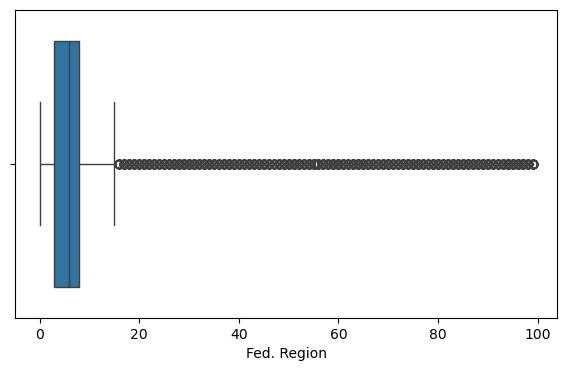

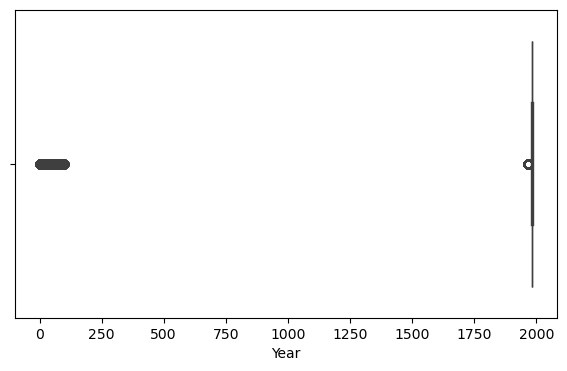

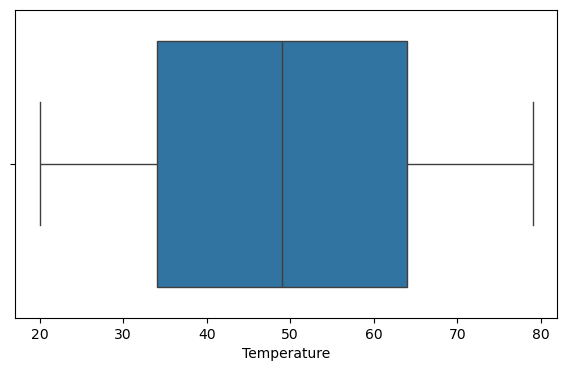

In [ ]:
# plotting graph to understand the data and check for outliers
for c in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df[c])  
    plt.show()

In [ ]:
# we see lot of outliers in Fed. Region and year , lets remove them 

print("Count where years < 1700: ",df[df['Year']<1700]['Year'].count())
print("Count where Fed. Region > 20: ",df[df['Fed. Region']>20]['Fed. Region'].count())

Count where years < 1700:  3423
Count where Fed. Region > 20:  2726


In [ ]:
# since number of rows are greater we replace them with mean

yearMean = df[df['Year']>=1700]['Year'].mean()
df.loc[df['Year']<1700,'Year'] = math.ceil(yearMean)

regionMean = df[df['Fed. Region']<=20]['Fed. Region'].mean()
df.loc[df['Fed. Region']>20,'Fed. Region'] = math.ceil(regionMean)

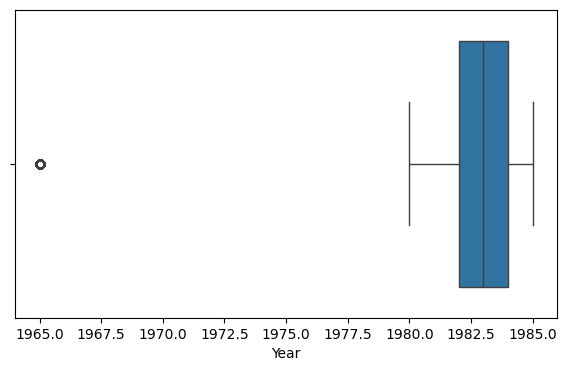

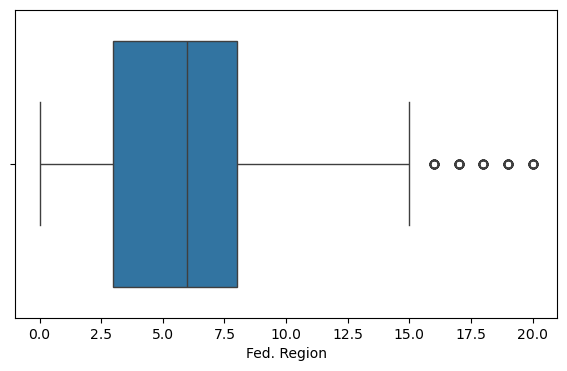

In [ ]:
for c in ['Year','Fed. Region']:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df[c])  
    plt.show()

In [ ]:
# since there are some more outliers , lets increase the cut-off for outliers again in Years and Fed. Region

print("Count where years < 1900: ",df[df['Year']<1900]['Year'].count())
print("Count where Fed. Region > 15: ",df[df['Fed. Region']>15]['Fed. Region'].count())

Count where years < 1900:  0
Count where Fed. Region > 15:  164


In [ ]:
# since there are few outliers in Fed. Region we replace them with mean

regionMean = df[df['Fed. Region']<=15]['Fed. Region'].mean()
df.loc[df['Fed. Region']>15,'Fed. Region'] = math.ceil(regionMean)

#### Handling mismatched string formats

In [ ]:
# checking for numeric values in string values 

print("Numeric values in String data type:")
for c in df.select_dtypes(include=['object']):
    numericValues = df[c].str.isnumeric()
    print(c,"-",numericValues.sum())

#  since the data count is high , we are replacing it with mode
for c in df.select_dtypes(include=['object']):
    numericValues = df[c].str.isnumeric()
    modeValue = df[c].mode()[0] #getting first index
    df.loc[numericValues,c]=modeValue

# setting row values to lowercase to make all string unique
for c in df.select_dtypes(include=['object']):    
    df[c]=df[c].str.lower()

Numeric values in String data type:
Block ID - 6502
County - 3452
Common Name - 3454
Scientific Name - 6539
NYS Protection Status - 9259
Family Name - 9183
Family Description - 9205
Breeding Behavior - 6526
Breeding Status - 0


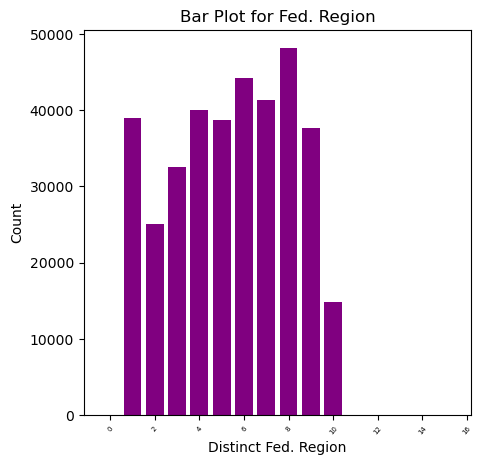

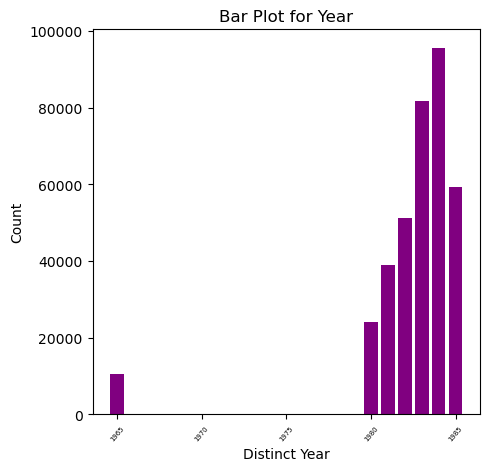

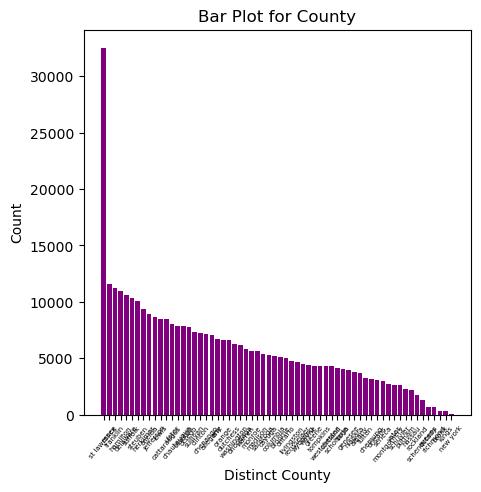

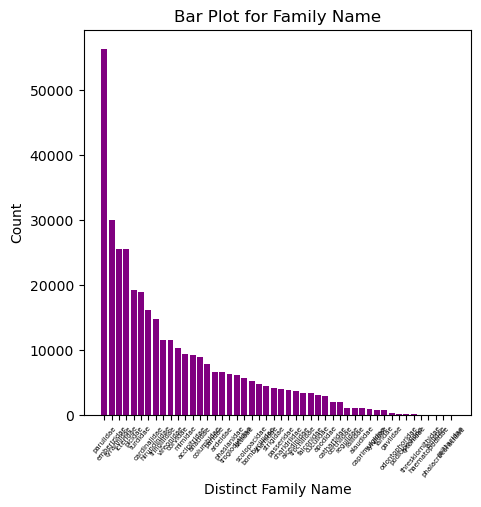

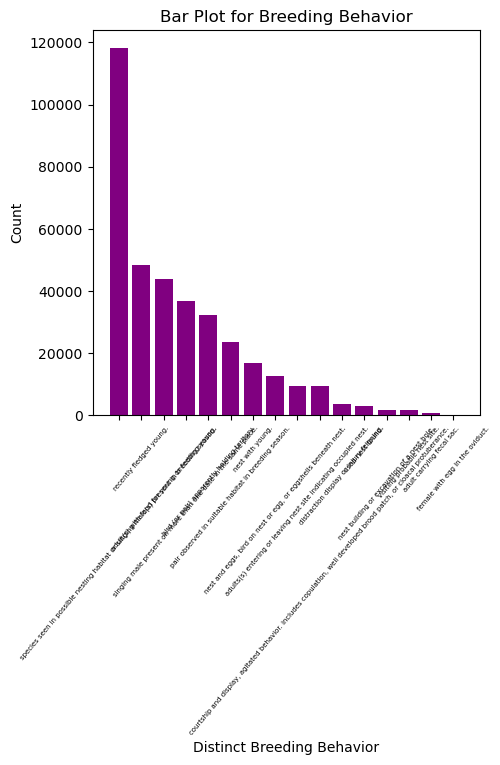

In [ ]:
columns = ['Fed. Region','Year','County','Family Name','Breeding Behavior']
for c in columns:
    ct_count = df[c].value_counts()
    plt.figure(figsize=(5,5))
    plt.bar(ct_count.index,ct_count.values , color = 'purple')
    plt.title(f"Bar Plot for {c}")
    plt.xlabel(f"Distinct {c}")
    plt.ylabel("Count")
    plt.xticks(rotation = 50, fontsize=5)
    plt.show()


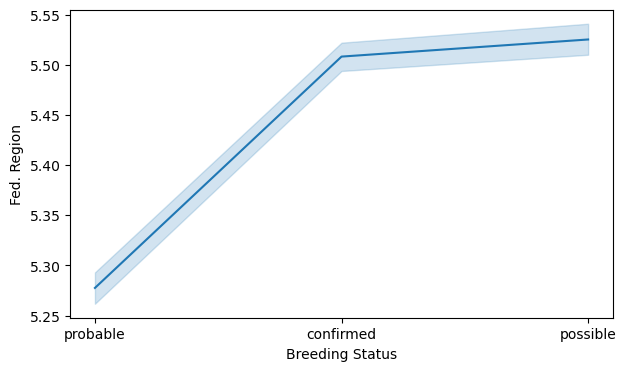

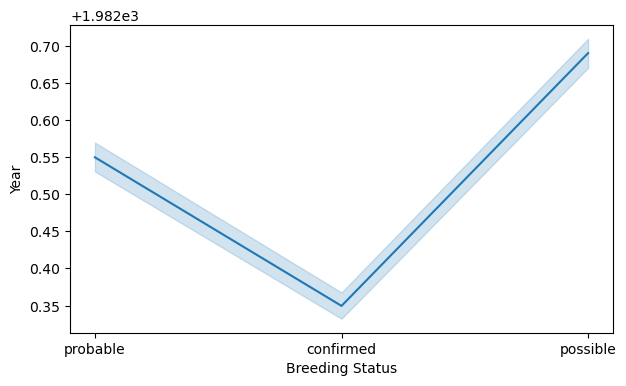

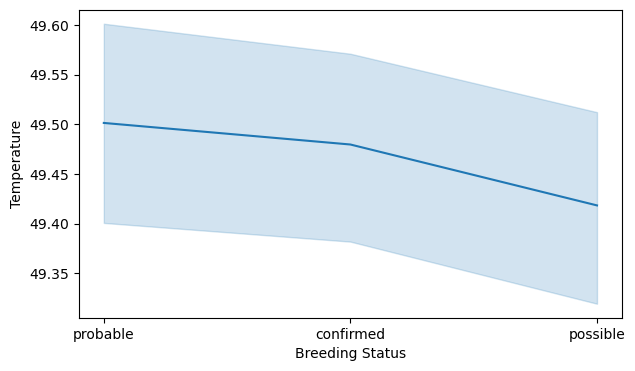

In [ ]:
# check for skewness
for c in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(7, 4))
    sns.lineplot(y=df[c],x=df["Breeding Status"])  
    plt.show()

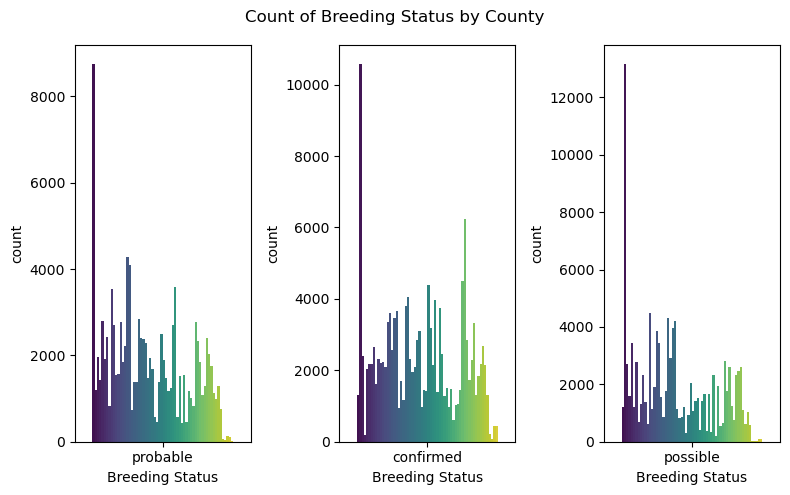

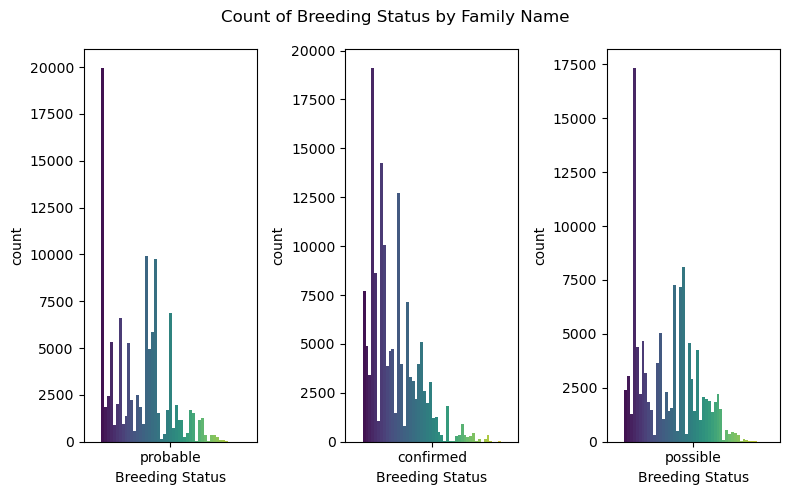

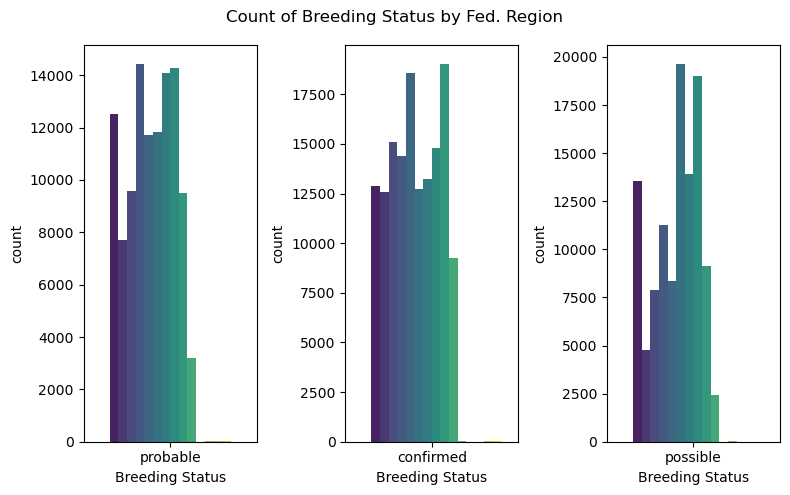

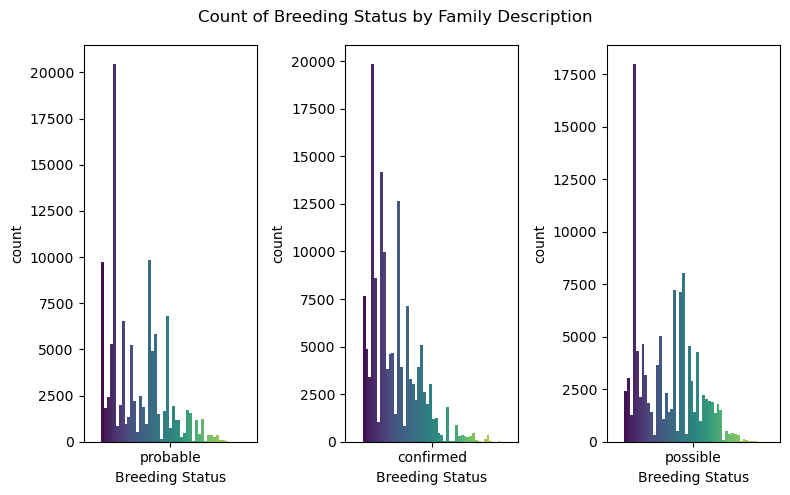

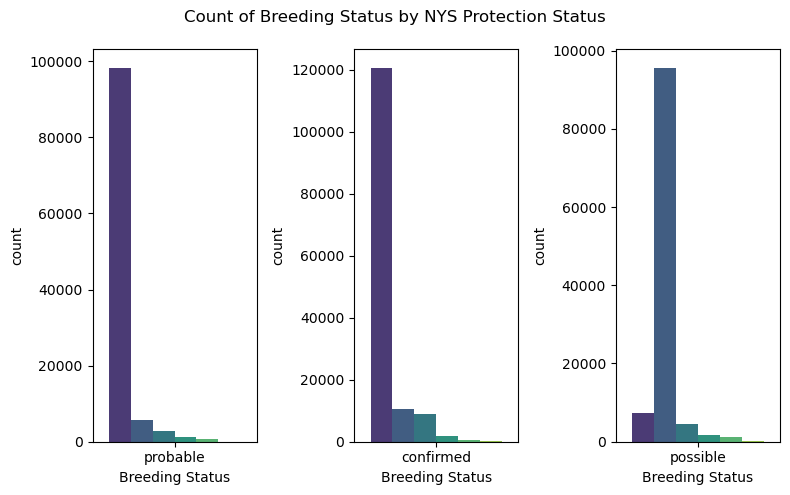

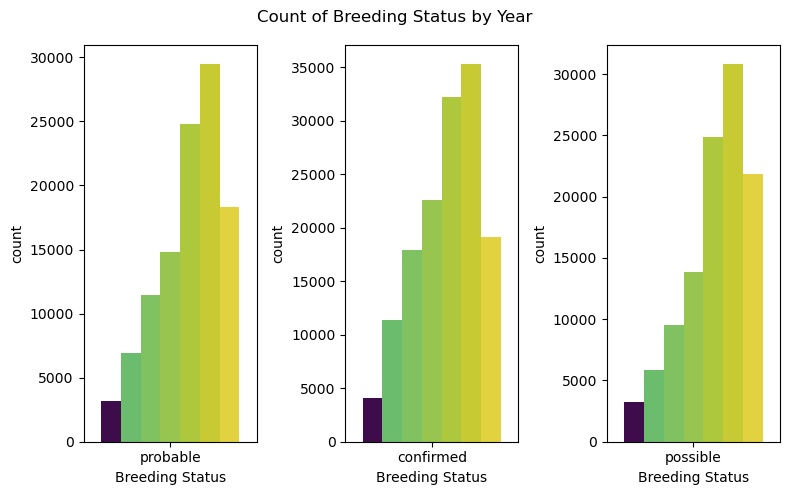

In [ ]:
for col in list(set(df.columns) - set(['Breeding Status','Block ID','Common Name','Scientific Name','Temperature','Breeding Behavior'])):

    unique_values = df['Breeding Status'].unique()

    fig,axs=plt.subplots(1,len(unique_values),figsize=(8,5))
    for i, value in enumerate(unique_values):
        sub = df[df['Breeding Status']==value]
        sns.countplot(data=sub, x='Breeding Status', hue=col, palette='viridis',ax=axs[i])
        axs[i].legend_.remove()
    fig.suptitle(f'Count of {"Breeding Status"} by {col}')
    plt.tight_layout()
    plt.show()




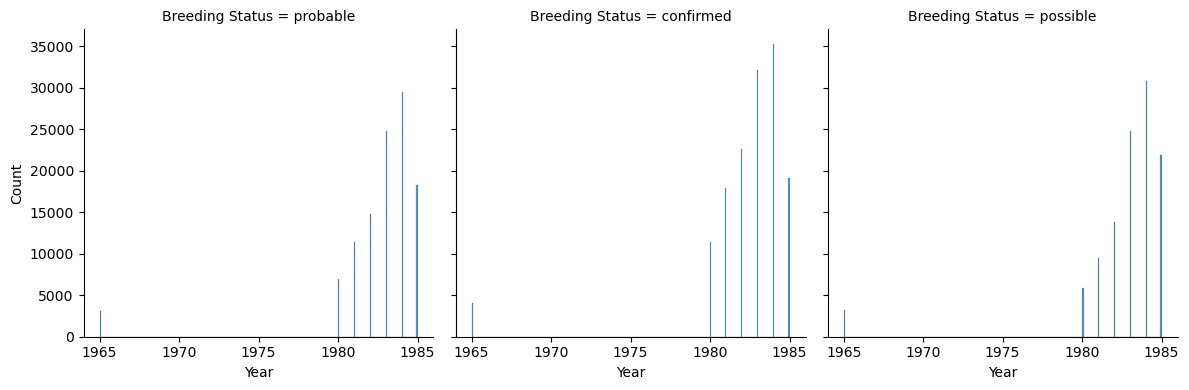

In [ ]:
g = sns.FacetGrid(df, col="Breeding Status", col_wrap=3, height=4)
g.map(sns.histplot, 'Year') 
plt.show()


#### Encoding features to Categorical values

In [ ]:
print("Unique values in each column after resolving mismatched data\n",df.nunique())

Unique values in each column after resolving mismatched data
 Fed. Region                16
Block ID                 5323
County                     62
Common Name               245
Scientific Name           245
NYS Protection Status       6
Family Name                48
Family Description         48
Breeding Behavior          16
Year                        7
Temperature                60
Breeding Status             3
dtype: int64


In [ ]:
# since certains columns have lot of distinct values , it is not ideal to use one-hot encoding as it would make the model complex with lot of columns and create a over-fitted model
# hence we use frequency-encdoing
for col in ["Block ID","Common Name","Family Description","Scientific Name","County","Family Name"]:
    frequency = df[col].value_counts()
    df[col] = df[col].map(frequency)

# for others we can use one-hot encoding
for col in ["Breeding Behavior"]:
    df = pd.get_dummies(df, columns=[col],drop_first=True) 

# label-encoding
df['Breeding Status'] = df['Breeding Status'].apply(lambda x: 1 if x == 'confirmed' else 0)

# for NYS Protection Status we can do label encoding
uniqueCategory = df['NYS Protection Status'].unique()
categoryIndex = {category:id for id ,category in enumerate(uniqueCategory)}
df['NYS Protection Status Encoded'] = df['NYS Protection Status'].map(categoryIndex)
df = df.drop("NYS Protection Status",axis = 1)


# normalizing the data 
for col in ["Block ID","Common Name","Family Description","Scientific Name","County","Year","Temperature","Fed. Region","Family Name"]:
    xMax = df[col].max(axis=0)
    xMin = df[col].min(axis=0)
    df[col]=df[col].apply(lambda x: (x-xMin)/(xMax-xMin))
    


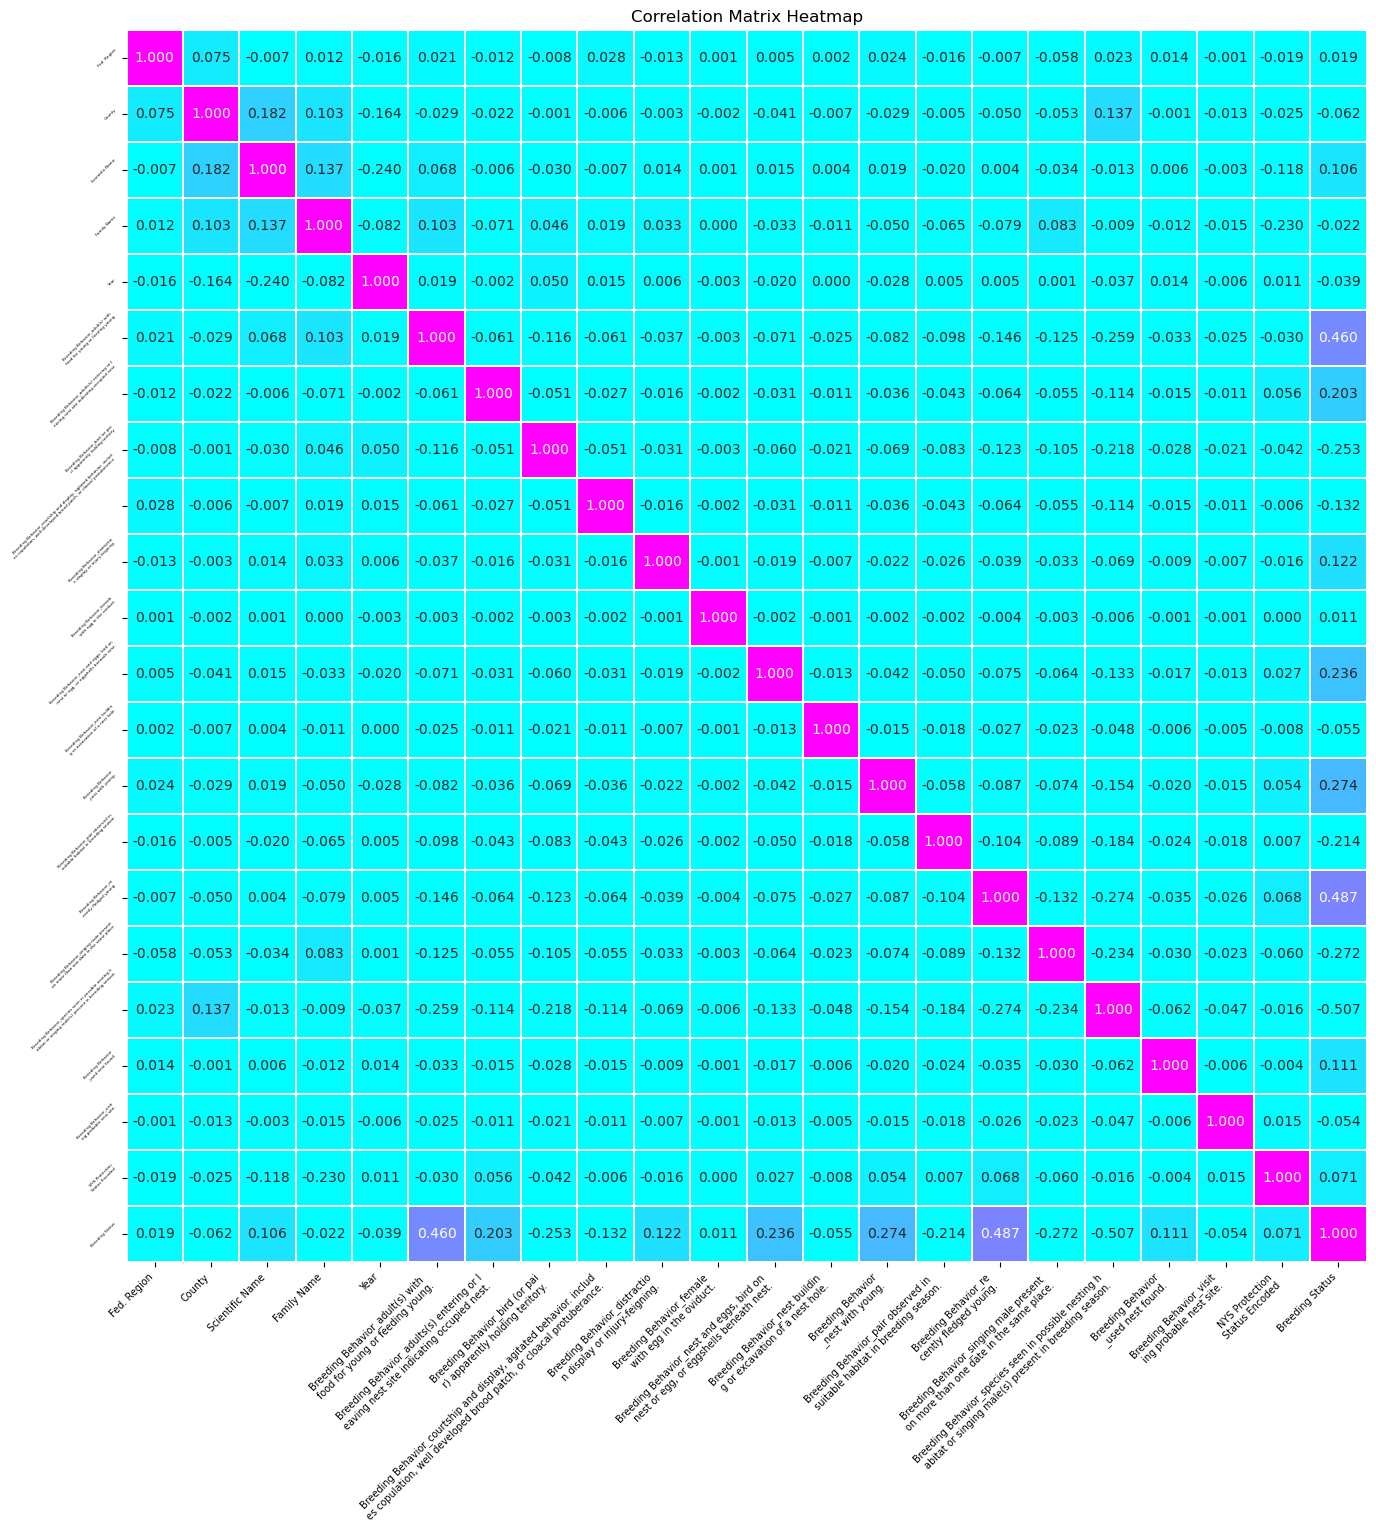

In [ ]:
# re-arranging columns
columnOrder = [x for x in df.columns if x != "Breeding Status"] + ["Breeding Status"]
df = df[columnOrder]

temp_columns = []
for i in range(len(df.columns)):
    if len(df.columns[i])>15:
        temp_columns.append(df.columns[i][:int(len(df.columns[i])/2)]+"\n"+df.columns[i][int(len(df.columns[i])/2):])
    else:
        temp_columns.append(df.columns[i])

df.columns = temp_columns



correlation_matrix = df.corr()


plt.figure(figsize=(16, 16))

sns.heatmap(correlation_matrix, annot=True, cmap='cool', vmin=0, vmax=1, linewidths=0.1, fmt='.3f' , cbar=False)    
plt.xticks(rotation=45, ha='right',fontsize=7) 
plt.yticks(rotation=45, ha='right',fontsize=3)
plt.title('Correlation Matrix Heatmap')
plt.show()

df.columns = columnOrder


#### Dropping Columns with low Correlation

In [ ]:
# dropping columns - Block ID , Temperature as it has very low relation with Breeding Status
df = df.drop(columns=['Block ID','Temperature'],axis=1)

In [ ]:
# family name and family description have same correlation , hence removing redundant column
df = df.drop(columns=['Family Description'],axis=1)

In [ ]:
# same goes for scientific name and common name 
df = df.drop(columns=['Common Name'],axis=1)

In [ ]:
df.to_csv('breeding_bird_atlas_preprocessed.csv', index=False)